<a href="https://colab.research.google.com/github/joynaomi81/Yoruba-Proverb-Detection/blob/main/Yoruba_Proverb_Dec_ipynb_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **Necessary** **Libraries**

In [ ]:
!pip install nltk pandas scikit-learn

In [ ]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data** **Review**

**Load** **dataset**

In [ ]:
# Load the datasets
df1 = pd.read_csv('/content/drive/MyDrive/New_trainset_proverb - Sheet1 (1).csv')
df2 = pd.read_csv('/content/drive/MyDrive/Proverb_Dec_new -.csv')

df1 = df1.iloc[:, :2]
df2 = df2.iloc[:, :2]

df1.columns = ['Proverbs', 'Labels']
df2.columns = ['Proverbs', 'Labels']

# Concatenate the datasets
Proverbs_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined dataset to a new CSV
Proverbs_df.to_csv('/content/drive/MyDrive/Proverbs_data.csv', index=False)

print("Datasets combined successfully and saved as 'Proverbs_data.csv'.")

Datasets combined successfully and saved as 'Proverbs_data.csv'.


In [ ]:
# Check for the first 5 rows
Proverbs_df.head()

,Proverbs,Labels
0,Àlùbọsà tí 'ò gbó ní í ď'ọkọ lọrùn.,1
1,Àti àwọn nǹkan mìíràn tí a ó nílò láti ...,0
2,Àwọn ọlọ́pàá fi páńpẹ́ òfin gbé bàbá alápatà.,0
3,"Ìgbà mìíràn rèé, wọ́n lè lé wọn dànù bí ...",0
4,Níbi tí wọ́n ti ń sọ̀rọ̀ ẹni tí wọ́n máa dìbò...,0


In [ ]:
# Check for the last five rows
Proverbs_df.tail()

,Proverbs,Labels
16001,"Yóò sanwo, yóò sì tún mú onídùúró t...",0
16002,Yòó tún jẹ́ kí ètò ọrọ̀ ajé orílẹ̀ èdè gbóunjẹ...,0
16003,Yorùbá bọ̀ wọ́n ní ẹni tó gbẹ́lẹ̀ ló sìn...,0
16004,Yòrùbá ní ọ̀nà à ti mọ ẹni tó lọmọ láye...,0
16005,Yọyọ lẹnu ayé ń dà.,1


In [ ]:
Proverbs_df.columns

Index(['Proverbs', 'Labels'], dtype='object')

In [ ]:
Proverbs_df.info() # information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16006 entries, 0 to 16005
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Proverbs  16006 non-null  object
 1   Labels    16006 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.2+ KB


**Descriptive statistics of the dataset**

In [ ]:
Proverbs_df.describe()

,Labels
count,16006.000000
mean,0.499938
std,0.500016
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Shape** **of** **the** **dataset**

In [ ]:
Proverbs_df.shape

(16006, 2)

Check for missing values using isnull()

In [ ]:
Proverbs_df.isnull().sum()

,0
Proverbs,0
Labels,0


There are no missing values in both Proverbs and labels columns.

In [ ]:
# Checking for duplicate rows in the DataFrame
Proverbs_df.duplicated().sum()

74

There are 74 rows in the DataFrame that are duplicates of other rows.

In [ ]:
# Clean up whitespace and casing
Proverbs_df['Proverbs'] = Proverbs_df['Proverbs'].str.strip().str.lower()

# Drop exact duplicates
Proverbs_df = Proverbs_df.drop_duplicates()

# Save the cleaned dataset to a new CSV file
Proverbs_df.to_csv('/content/drive/MyDrive/Cleaned_Combined_Proverbs.csv', index=False)

In [ ]:
# Drop duplicates rows
data = Proverbs_df.drop_duplicates()


In [ ]:
Proverbs_df.duplicated().sum()

0

In [ ]:
# Check for the new data shape
Proverbs_df.shape

(15925, 2)

In [ ]:
Proverbs_df.dtypes

,0
Proverbs,object
Labels,int64


In [ ]:
# Check for unique values
Proverbs_df['Proverbs'].unique()

array(["àlùbọsà tí 'ò gbó ní í ď'ọkọ lọrùn.",
       'àti àwọn nǹkan mìíràn tí a ó nílò láti fi rìnrìn àjò náà.',
       'àwọn ọlọ́pàá fi páńpẹ́ òfin gbé bàbá alápatà.', ...,
       'yorùbá bọ̀ wọ́n ní ẹni tó gbẹ́lẹ̀ ló sìnkú, ariwo lásán ni ẹlẹ́kún ń sun.',
       'yòrùbá ní ọ̀nà à ti mọ ẹni tó lọmọ láyé àtijọ́.',
       'yọyọ lẹnu ayé ń dà.'], dtype=object)

In [ ]:
# Check for unique values in the label column
Proverbs_df['Labels'].unique()

array([1, 0])

* 1 = Proverb
* 0 = Non_Proverbs

In [ ]:
Proverbs_df['Labels'].value_counts()

,count
Labels,
1,7963
0,7962


* There are 7970 proverbs in the label column and 7962 non proverbs.

# **Data Visualization**

## Bar Plot

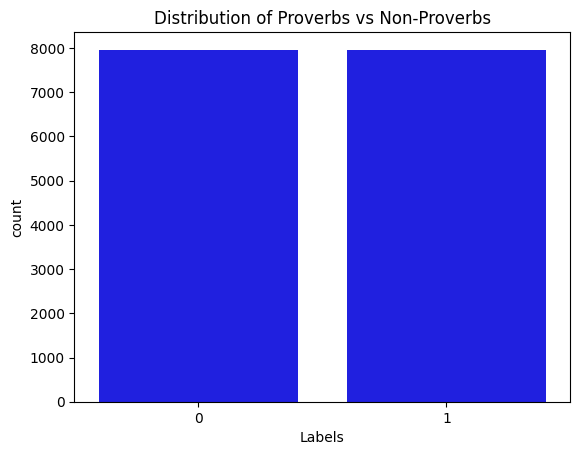

In [ ]:
# Check for distribution of proverbs and non-proverbs
sns.countplot(x='Labels', data=data, color='blue')
plt.title('Distribution of Proverbs vs Non-Proverbs')
plt.show()

## Pie Chart Plot

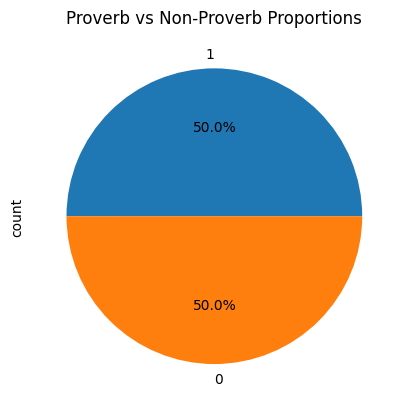

In [ ]:
# Distribution between Proverbs and Non-Proverbs using Pie Chart
Proverbs_df['Labels'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Proverb vs Non-Proverb Proportions')
plt.show()


## Data Preprocessing

Text Normalization

* Lowering text.
* Tokenization .
* Stemming.
* Removal of stopwords.
* Removal of punctuation.

Vectorization
TF_IDF



## Text Normalization

In [ ]:
from transformers import BertTokenizer
import pandas as pd

# Load the combined dataset
data = pd.read_csv('/content/drive/MyDrive/Cleaned_Combined_Proverbs.csv')

# multilingual BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the 'Proverbs' column using subword tokenization
data['Proverbs'] = data['Proverbs'].apply(lambda x: tokenizer.tokenize(x))

# Save the tokenized dataset
data.to_csv('/content/drive/MyDrive/Subword_Tokenized_Proverbs.csv', index=False)

print("Subword tokenization complete! Saved as 'Subword_Tokenized_Proverbs.csv'.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Subword tokenization complete! Saved as 'Subword_Tokenized_Proverbs.csv'.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Subword_Tokenized_Proverbs.csv')

In [ ]:
df.head()

,Proverbs,Labels
0,"['à', '##l', '##ù', '##b', '##ọ', '##sà', 'tí'...",1
1,"['àti', 'àwọn', 'n', '##ǹ', '##kan', 'm', '##ì...",0
2,"['àwọn', 'ọ', '##l', '##ọ́', '##pà', '##á', 'f...",0
3,"['ì', '##g', '##bà', 'm', '##ìí', '##rà', '##n...",0
4,"['ní', '##bi', 'tí', 'w', '##ọ́n', 'ti', 'ń', ...",0


In [ ]:
df.tail()

,Proverbs,Labels
15920,"['y', '##ó', '##ò', 'san', '##wo', ',', 'y', '...",0
15921,"['y', '##ò', '##ó', 'tú', '##n', 'jẹ́', 'k', '...",0
15922,"['yo', '##r', '##ù', '##bá', 'bọ', '##̀', 'w',...",0
15923,"['y', '##ò', '##r', '##ù', '##bá', 'ní', 'ọ', ...",0
15924,"['y', '##ọ', '##y', '##ọ', 'l', '##ẹ', '##nu',...",1


In [ ]:
def remove_punctuations(text):
    # Check if the input is a string
    if isinstance(text, str):
        punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
        for x in text:
            if x in punctuations:
                text = text.replace(x, "")
        return text
    # If the input is a list
    elif isinstance(text, list):
        # Join the list elements into a string
        text_str = " ".join(text)
        # Apply the same logic as before on the joined string
        punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
        for x in text_str:
            if x in punctuations:
                text_str = text_str.replace(x, "")
        # Return the cleaned string
        return text_str
    # Handle cases where input is neither a string nor a list
    else:
        return text

In [ ]:
data['Proverbs'] = data['Proverbs'].apply(remove_punctuations)
data.head()

,Proverbs,Labels
0,à l ù b ọ sà tí ò g bó ní í ď ọ k ọ l ọ r ùn,1
1,àti àwọn n ǹ kan m ìí rà n tí a ó ní lò lá ti ...,0
2,àwọn ọ l ọ́ pà á fi p á ń p ẹ́ ò fin g bé bà b...,0
3,ì g bà m ìí rà n r è é w ọ́n l è l é w ọn dà ...,0
4,ní bi tí w ọ́n ti ń s ọ̀ r ọ̀ ẹ ni tí w ọ́n má...,0


* URL removal
* HTML tag removal
* Tokenization
* Stopword removal
* Stemming

In [ ]:
import re
from nltk.stem import PorterStemmer

# Custom Yoruba stopword list
yoruba_stopwords = ['ó', 'ní', 'ṣe', 'rẹ̀', 'tí', 'àwọn', 'sí', 'ni', 'náà',
                    'láti', 'kan', 'ti', 'ń', 'lọ', 'o', 'bí', 'padà', 'sì',
                    'wá', 'lè', 'wà', 'kí', 'púpọ̀', 'mi', 'wọ́n', 'pẹ̀lú',
                    'a', 'ṣùgbọ́n', 'fún', 'jẹ́', 'fẹ́', 'kò', 'jù', 'pé',
                    'é', 'gbogbo', 'inú', 'bẹ̀rẹ̀', 'jẹ', 'nítorí', 'nǹkan',
                    'sínú', 'yìí', 'ṣé', 'àti', 'í', 'máa', 'nígbà', 'mo',
                    'an', 'mọ̀', 'bá', 'kì', 'ńlá', 'ọ̀pọ̀lọpọ̀', 'ẹmọ́',
                    'wọn', 'òun']

stop_words = list(yoruba_stopwords)

# stemmer
stemmer = PorterStemmer()

# Define function to remove URLs, HTML tags, stopwords, and apply stemming

def clean_text(text):
    # Check if input is a list and join into a string if necessary
    if isinstance(text, list):
        text = ' '.join(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Tokenize the text
    words = text.split()

    # Remove stopwords and apply stemming
    filtered_and_stemmed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]

    # Join the filtered and stemmed words back into a sentence
    return ' '.join(filtered_and_stemmed_words)

# Apply the clean_text function to each row in the 'Proverbs' column
df['Proverbs'] = data['Proverbs'].apply(clean_text)

df.head()

,Proverbs,Labels
0,à l ù b ọ sà ò g bó ď ọ k ọ l ọ r ùn,1
1,n ǹ m ìí rà n lò lá fi r ì n rì n à j ò,0
2,ọ l ọ́ pà á fi p á p ẹ́ ò fin g bé bà alá pat à,0
3,ì g bà m ìí rà n r è w ọ́n l è l w ọn dà n ù w...,0
4,bi w ọ́n s ọ̀ r ọ̀ ẹ w ọ́n má dì b ò f ún à rí...,0


In [ ]:
# a new DataFrame to keep cleaned text and labels
final_data = data[['Proverbs', 'Labels']].copy()

# save the new dataset
final_data.to_csv('cleaned_proverbs_with_labels.csv', index=False)

# Output
print(data[['Proverbs', 'Labels']])  # print the  cleaned text and labels

                                                Proverbs  Labels
0        à l ù b ọ sà tí  ò g bó ní í ď  ọ k ọ l ọ r ùn        1
1      àti àwọn n ǹ kan m ìí rà n tí a ó ní lò lá ti ...       0
2      àwọn ọ l ọ́ pà á fi p á ń p ẹ́ ò fin g bé bà b...       0
3      ì g bà m ìí rà n r è é  w ọ́n l è l é w ọn dà ...       0
4      ní bi tí w ọ́n ti ń s ọ̀ r ọ̀ ẹ ni tí w ọ́n má...       0
...                                                  ...     ...
15920  y ó ò san wo  y ó ò sì tú n m ú on íd ù úr ó t...       0
15921  y ò ó tú n jẹ́ k í è tò ọ r ọ̀ aj é or íl ẹ̀ è...       0
15922  yo r ù bá bọ ̀ w ọ́n ní ẹ ni tó g b ẹ́ l ẹ̀ l ...       0
15923  y ò r ù bá ní ọ ̀ n à à ti m ọ ẹ ni tó l ọ m ọ...       0
15924                          y ọ y ọ l ẹ nu ay é ń dà        1

[15925 rows x 2 columns]


In [ ]:
df.columns # new column

Index(['Proverbs', 'Labels'], dtype='object')

In [ ]:
df = pd.read_csv('/content/cleaned_proverbs_with_labels.csv') # load the new dataset

In [ ]:
df.head()

,Proverbs,Labels
0,à l ù b ọ sà tí ò g bó ní í ď ọ k ọ l ọ r ùn,1
1,àti àwọn n ǹ kan m ìí rà n tí a ó ní lò lá ti ...,0
2,àwọn ọ l ọ́ pà á fi p á ń p ẹ́ ò fin g bé bà b...,0
3,ì g bà m ìí rà n r è é w ọ́n l è l é w ọn dà ...,0
4,ní bi tí w ọ́n ti ń s ọ̀ r ọ̀ ẹ ni tí w ọ́n má...,0


In [ ]:
X = df['Proverbs']  # Features
y = df['Labels']  # Labels
# The clean_text represent the proverbs

# **Text Vectorization using TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X_tfidf = tfidf_vectorizer.fit_transform(X)


In [ ]:
# Convert the TF-IDF sparse matrix to a dense format
X_tfidf_dense = X_tfidf.toarray()

# Create a DataFrame with the feature names (terms)
tfidf_df = pd.DataFrame(X_tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())

# Display the DataFrame
print(tfidf_df)


       1466   38  427  438  443   aa   ab  aba  aber  abi  ...   ęs   șa   și  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
15920   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
15921   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
15922   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
15923   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
15924   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   

        șu   ẹp   ệm   ọa  

# **Training and Evaluation Using Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.858712715855573
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1620
           1       0.88      0.82      0.85      1565

    accuracy                           0.86      3185
   macro avg       0.86      0.86      0.86      3185
weighted avg       0.86      0.86      0.86      3185



In [ ]:
from sklearn.metrics import confusion_matrix  # Import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1449  171]
 [ 279 1286]]


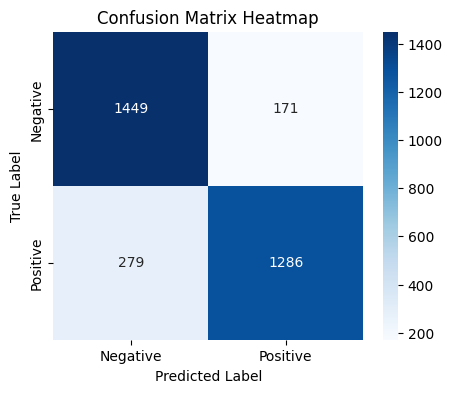

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
#  predictions on the test set
test_predictions = nb_classifier.predict(X_test)

# Output of predictions along with the actual labels
for actual, predicted in zip(y_test, test_predictions):
    print(f'Actual Label: {actual} - Predicted Label: {predicted}')


Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 1 - Predicted Label: 1
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
Actual Label: 0 - Predicted Label: 0
A

In [ ]:
#new data
new_data = ["Agba ki wa loja, ki ori omo titun o wo."]
# Transform the new data using the same TF-IDF vectorizer
new_data_tfidf = tfidf_vectorizer.transform(new_data)

# Make predictions on the new data
new_predictions = nb_classifier.predict(new_data_tfidf)

# Output of predictions along with the text
for text, predicted_label in zip(new_data, new_predictions):
    print(f'Text: "{text}" - Predicted Label: {predicted_label}')


Text: "Agba ki wa loja, ki ori omo titun o wo." - Predicted Label: 1


In [ ]:
true_labels = ["proverb"]

for text, actual, predicted in zip(new_data, true_labels, new_predictions):
    print(f'Text: "{text}" - Actual Label: {actual} - Predicted Label: {predicted}')

Text: "Agba ki wa loja, ki ori omo titun o wo." - Actual Label: proverb - Predicted Label: 1


# **Save Model**

In [ ]:
import joblib

# Save the trained Naive Bayes classifier and the TF-IDF vectorizer
joblib.dump(nb_classifier, 'naive_bayes_classifier.pkk')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkk')


['tfidf_vectorizer.pkk']